# Machine Learning Modeling & Analysis

In this notebook we perform machine learning analysis using a number of different models. 

In [35]:
# %matplotlib inline
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import folium # for mapping
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

#### Import the Data


In [2]:
df = pd.read_csv('../data/uk_accidents_prepared.csv', low_memory=False, index_col=0)

Display the columns 

In [3]:
pd.set_option('display.max_columns', None)
# df.head()
df

,Accident_Severity,light_Darkness - lights lit,light_Darkness - no lighting,light_Daylight,road_Dual carriageway,road_On/off ramp,road_One way street,road_Roundabout,road_Single carriageway,speed_Over 40 km/s,speed_Under 40 km/s,area_Rural,area_Urban,age_Adolescent,age_Adult,age_Senior,vehicle_Bike,vehicle_Car,vehicle_Goods,vehicle_Motorcycle
357,Fatal,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1
6695,Fatal,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
6715,Fatal,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
6742,Fatal,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
6751,Fatal,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723930,Serious,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
1675696,Serious,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0
1388139,Serious,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
1539309,Serious,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0


Make a copy of the dataframe and deop the Accident_Severity column.  This will be the Feature data.

In [4]:
X = df.copy()
X.drop(['Accident_Severity'],axis=1,inplace=True)
# X = X[['speed_Over 40 km/s', 'speed_Under 40 km/s']]
# X = X[['speed_Over 40 km/s', 'speed_Under 40 km/s', 'area_Rural', 'area_Urban']]
# X = X[['speed_Over 40 km/s', 'speed_Under 40 km/s', 'area_Rural', 'area_Urban', 
#        'age_Adolescent', 'age_Adult', 'age_Senior']]
# X = X[['vehicle_Bike','vehicle_Car','vehicle_Goods','vehicle_Motorcycle']]
X.reset_index(drop=True,inplace=True)

In [5]:
X

,light_Darkness - lights lit,light_Darkness - no lighting,light_Daylight,road_Dual carriageway,road_On/off ramp,road_One way street,road_Roundabout,road_Single carriageway,speed_Over 40 km/s,speed_Under 40 km/s,area_Rural,area_Urban,age_Adolescent,age_Adult,age_Senior,vehicle_Bike,vehicle_Car,vehicle_Goods,vehicle_Motorcycle
0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71164,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0
71165,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0
71166,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0
71167,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0


In [6]:
y = df.copy()
y = y['Accident_Severity']
y.reset_index(drop=True,inplace=True)

In [7]:
y

0          Fatal
1          Fatal
2          Fatal
3          Fatal
4          Fatal
          ...   
71164    Serious
71165    Serious
71166    Serious
71167    Serious
71168    Serious
Name: Accident_Severity, Length: 71169, dtype: object

### Training & Testing Sets

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print()



Train set: (53376, 19) (53376,)
Test set: (17793, 19) (17793,)



### $k$-Nearest Neighbors

In [9]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 75)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=10)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74])})

In [10]:
#check top performing n_neighbors value
k = knn_gscv.best_params_['n_neighbors']
print(knn_gscv.best_params_)

{'n_neighbors': 64}


In [11]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.485255800977405

In [12]:
# Make sure you're using the full training set (NOT the split training set for the kNN)!!!
print('Original Full Training set:')
print(X_train.shape)
print(y_train.shape)
print()
#Train Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
print(knn)

Original Full Training set:
(53376, 19)
(53376,)

KNeighborsClassifier(n_neighbors=64)


In [13]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix

In [14]:
# k Nearest Neighbors
yhat_knn = knn.predict(X_test)
# print(yhat_knn[0:5])
print("KNN Precision Score: %0.2f" % metrics.precision_score(y_test, yhat_knn, average='weighted'))
print("KNN Recall Score: %0.2f" % metrics.recall_score(y_test, yhat_knn, average='weighted'))
print("KNN Jaccard Score: %0.2f" % metrics.jaccard_score(y_test, yhat_knn, average='weighted'))
print("KNN F1-Score: %0.2f" % metrics.f1_score(y_test, yhat_knn, average='weighted'))


KNN Precision Score: 0.48
KNN Recall Score: 0.49
KNN Jaccard Score: 0.31
KNN F1-Score: 0.47


<IPython.core.display.Javascript object>


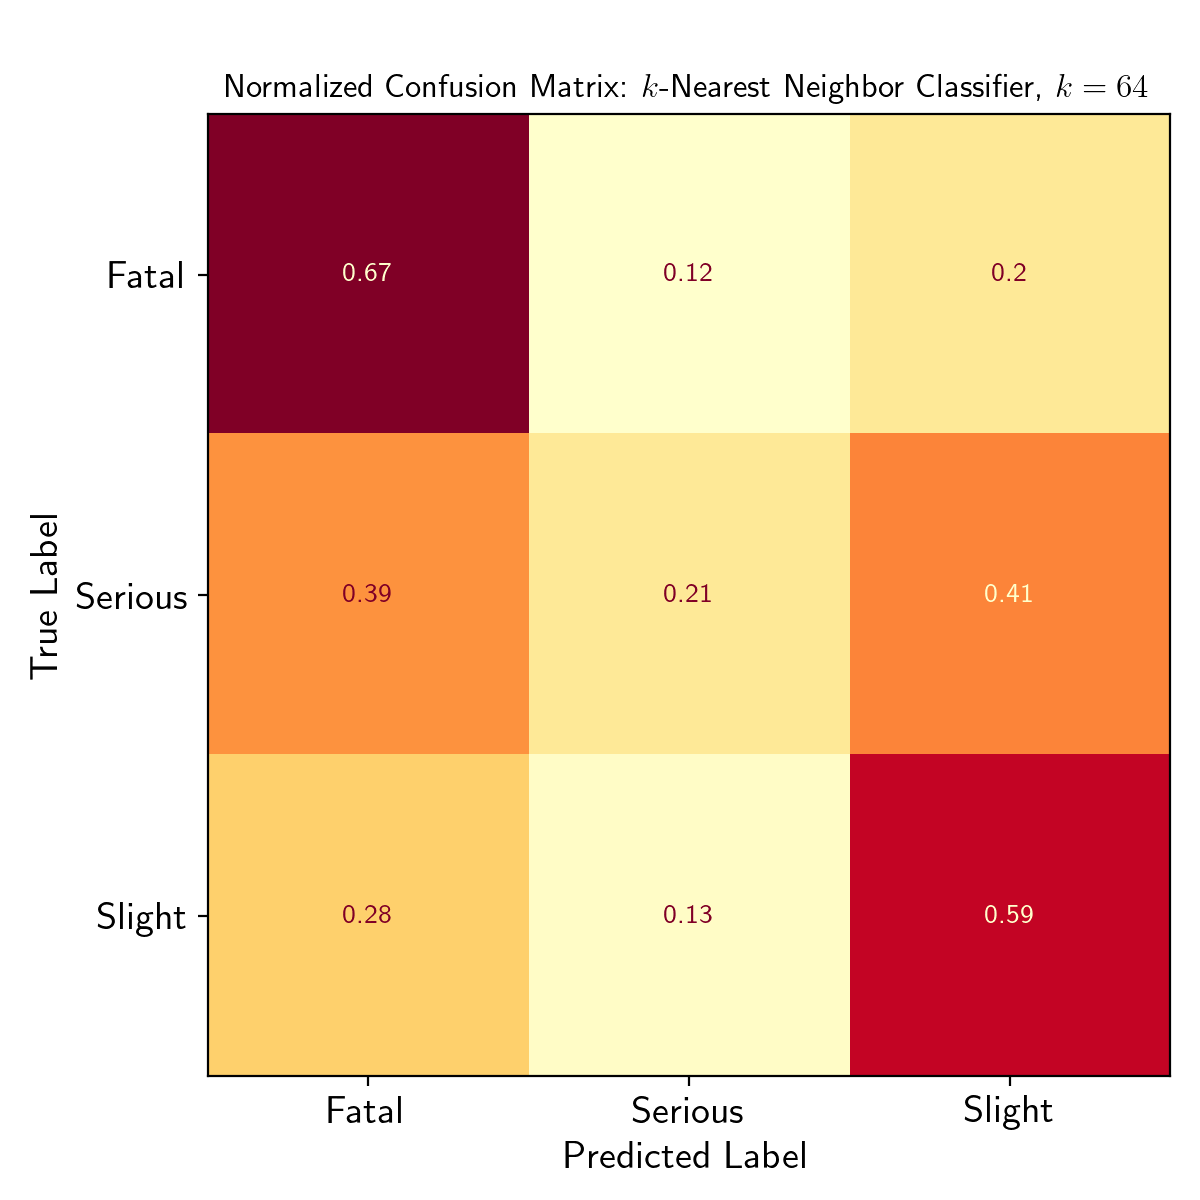

[[0.67470289 0.12139219 0.20390492]
 [0.38725072 0.20504517 0.40770411]
 [0.27534791 0.13038436 0.59426773]]


In [37]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
fontsize=14

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(knn, X_test, y_test,
                             cmap=plt.cm.YlOrRd,
                             normalize='true',
                             ax = ax1)

ax1.set_title('Normalized Confusion Matrix: $k$-Nearest Neighbor Classifier, $k=%d$' % k,fontsize=fontsize-2)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.set_xlabel('Predicted Label', fontsize=fontsize)
ax1.set_ylabel('True Label', fontsize=fontsize)
# remove the colorbar
disp.im_.colorbar.remove()

plt.tight_layout()
plt.savefig('/Users/rem/IBM_data_science/9_Capstone/figures/knn_conf_matrix.png',dpi=300)

print(disp.confusion_matrix)

### Decision Trees

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
decTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [18]:
# Make sure you're using the full training set (NOT the split training set for the kNN)!!!
print('Original Full Training set:')
print(X_train.shape)
print(y_train.shape)
print()
decTree.fit(X_train,y_train)

Original Full Training set:
(53376, 19)
(53376,)



DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [19]:
# Decision Tree
yhat_decTree = decTree.predict(X_test)
# print(yhat_decTree[0:5])
print("Decision Tree Precision Score: %0.2f" % metrics.precision_score(y_test, yhat_decTree, average='weighted'))
print("Decision Tree Recall Score: %0.2f" % metrics.recall_score(y_test, yhat_decTree, average='weighted'))
print("Decision Tree Jaccard Score: %0.2f" % metrics.jaccard_score(y_test, yhat_decTree, average='weighted'))
print("Decision Tree F1-Score: %0.2f" % metrics.f1_score(y_test, yhat_decTree, average='weighted'))


Decision Tree Precision Score: 0.49
Decision Tree Recall Score: 0.50
Decision Tree Jaccard Score: 0.31
Decision Tree F1-Score: 0.46


<IPython.core.display.Javascript object>


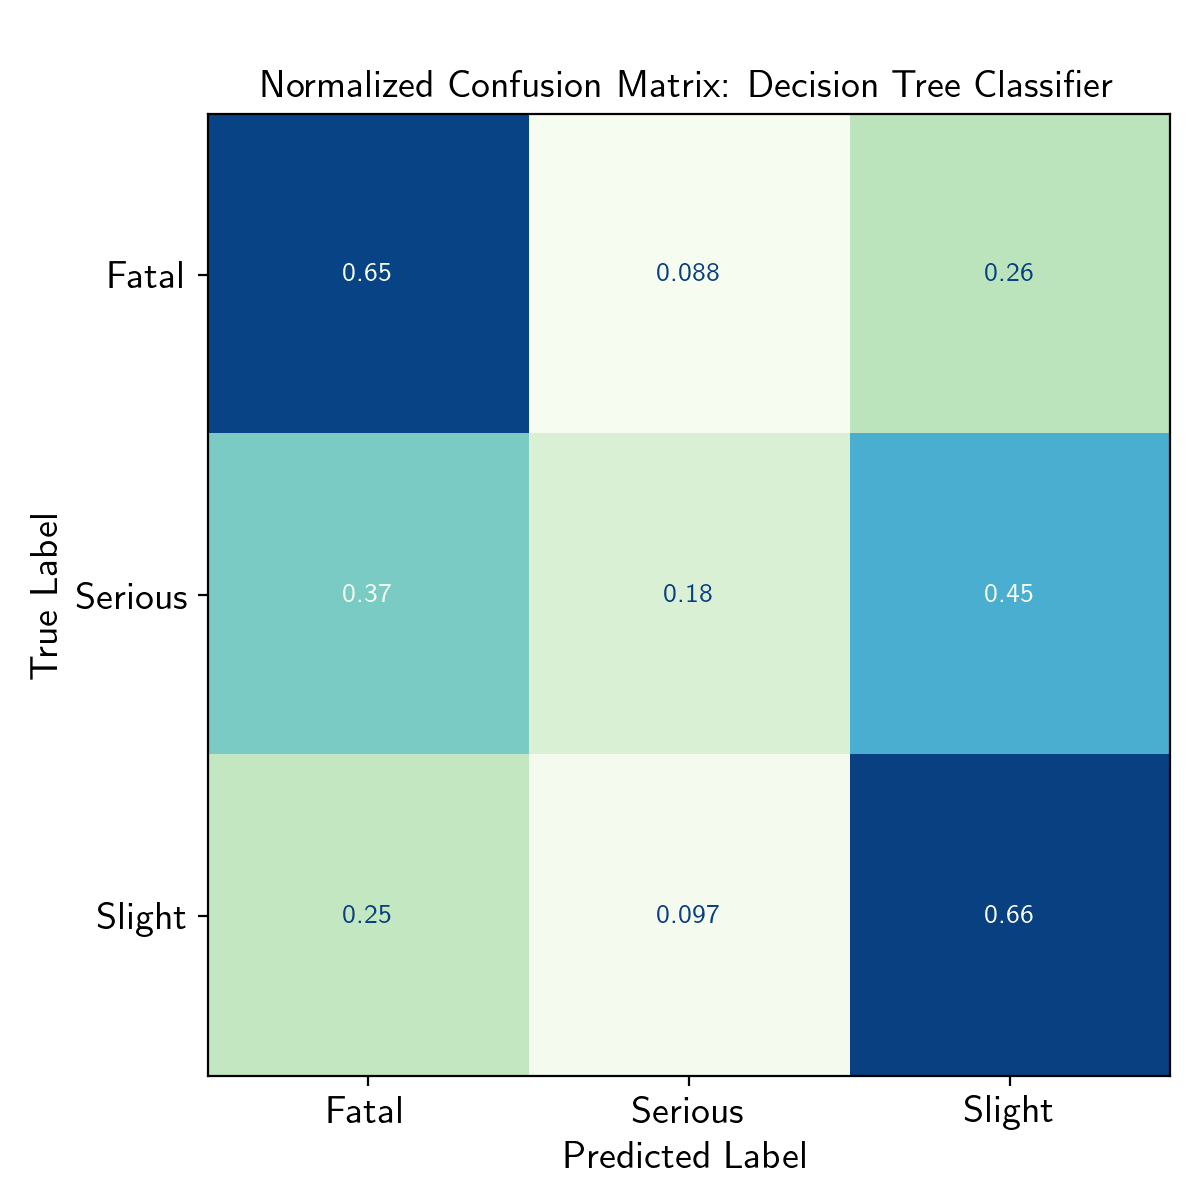

[[0.64906621 0.08811545 0.26281834]
 [0.37225158 0.17726266 0.45048577]
 [0.24685222 0.09741551 0.65573227]]


In [38]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
fontsize=14

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(decTree.fit(X_train,y_train), X_test, y_test,
                             cmap=plt.cm.GnBu,
                             normalize='true',
                             ax = ax1)

ax1.set_title('Normalized Confusion Matrix: Decision Tree Classifier',fontsize=fontsize)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.set_xlabel('Predicted Label', fontsize=fontsize)
ax1.set_ylabel('True Label', fontsize=fontsize)
# remove the colorbar
disp.im_.colorbar.remove()

plt.tight_layout()
plt.savefig('/Users/rem/IBM_data_science/9_Capstone/figures/decTree_conf_matrix.png',dpi=300)

print(disp.confusion_matrix)

### Support Vector Machines

In [21]:
from sklearn import svm

In [22]:
svm_rbf = svm.SVC(kernel='rbf')

In [23]:
# Make sure you're using the full training set (NOT the split training set for the kNN)!!!
print('Original Full Training set:')
print(X_train.shape)
print(y_train.shape)
print()
svm_rbf.fit(X_train, y_train) 

Original Full Training set:
(53376, 19)
(53376,)



SVC()

In [24]:
# Support Vector Machines
yhat_svm_rbf = svm_rbf.predict(X_test)
# print(yhat_svm_rbf[0:5])
print("SVM Precision Score: %0.2f" % metrics.precision_score(y_test, yhat_knn, average='weighted'))
print("SVM Recall Score: %0.2f" % metrics.recall_score(y_test, yhat_knn, average='weighted'))
print("SVM Jaccard Score: %0.2f" % metrics.jaccard_score(y_test, yhat_svm_rbf, average='weighted'))
print("SVM F1-Score: %0.2f" % metrics.f1_score(y_test, yhat_svm_rbf, average='weighted'))


SVM Precision Score: 0.48
SVM Recall Score: 0.49
SVM Jaccard Score: 0.32
SVM F1-Score: 0.47


<IPython.core.display.Javascript object>


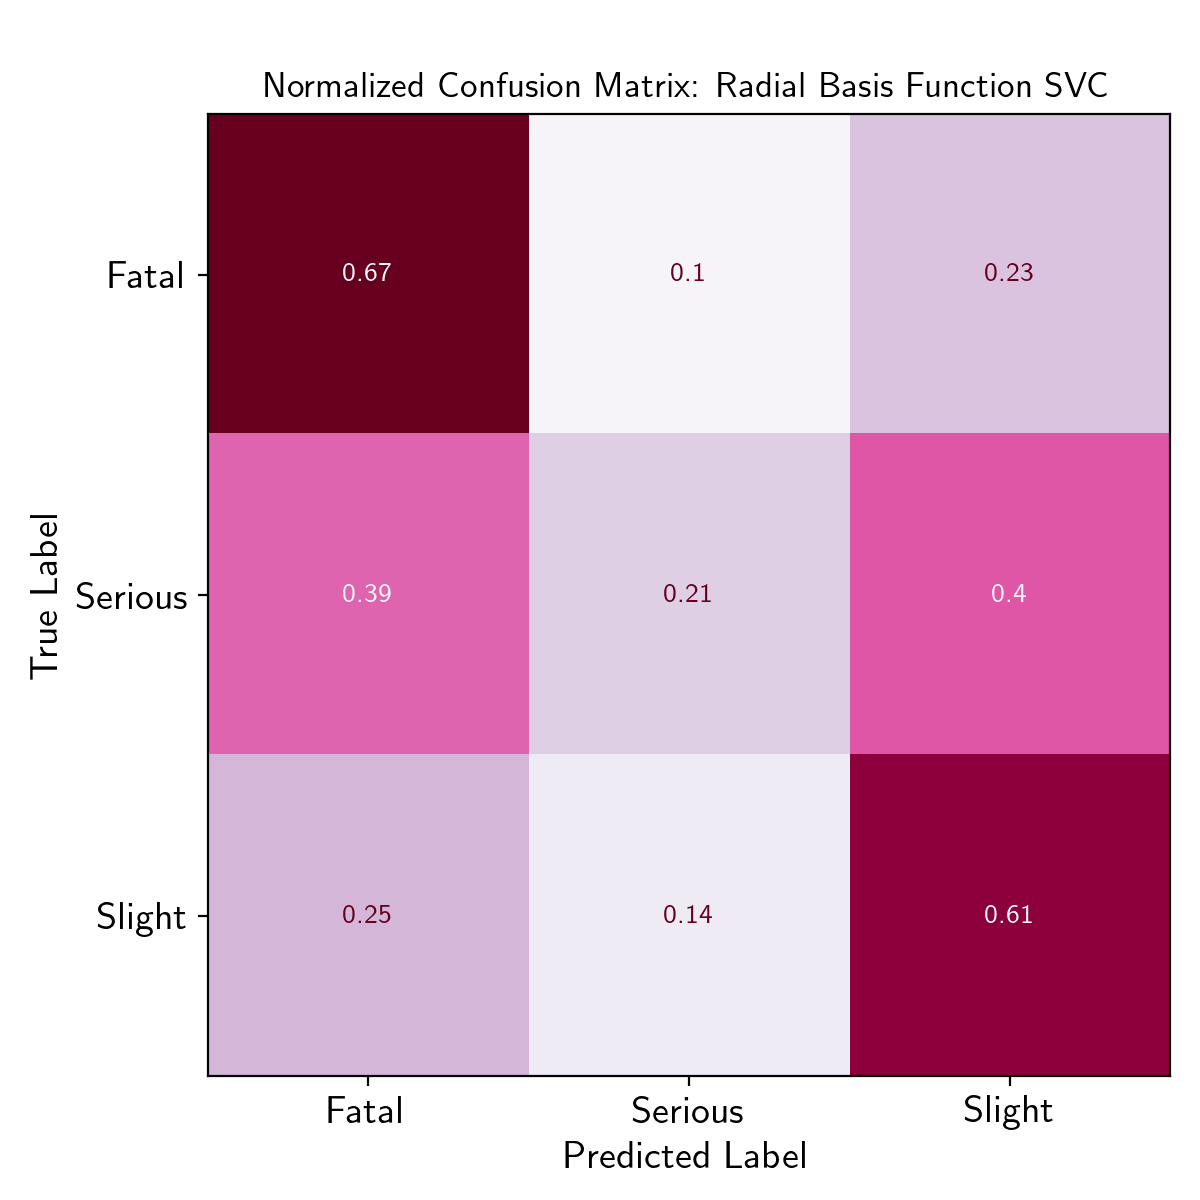

[[0.66960951 0.10339559 0.22699491]
 [0.38861428 0.20726095 0.40412477]
 [0.24950298 0.13734261 0.61315441]]


In [45]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
fontsize=14

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(svm_rbf.fit(X_train, y_train) , X_test, y_test,
                             cmap=plt.cm.PuRd,
                             normalize='true',
                             ax = ax1)

ax1.set_title('Normalized Confusion Matrix: Radial Basis Function SVC',fontsize=fontsize-1)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.set_xlabel('Predicted Label', fontsize=fontsize)
ax1.set_ylabel('True Label', fontsize=fontsize)
# remove the colorbar
disp.im_.colorbar.remove()

plt.tight_layout()
plt.savefig('/Users/rem/IBM_data_science/9_Capstone/figures/svcrbf_conf_matrix.png',dpi=300)

print(disp.confusion_matrix)

### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [27]:
# Support Vector Machines
yhat_clf = clf.predict(X_test)
# print(yhat_svm_rbf[0:5])
print("Rand. Forest Precision Score: %0.2f" % metrics.precision_score(y_test, yhat_knn, average='weighted'))
print("Rand. Forest Recall Score: %0.2f" % metrics.recall_score(y_test, yhat_knn, average='weighted'))
print("Rand. Forest Jaccard Score: %0.2f" % metrics.jaccard_score(y_test, yhat_clf, average='weighted'))
print("Rand. Forest F1-Score: %0.2f" % metrics.f1_score(y_test, yhat_clf, average='weighted'))


Rand. Forest Precision Score: 0.48
Rand. Forest Recall Score: 0.49
Rand. Forest Jaccard Score: 0.30
Rand. Forest F1-Score: 0.45


<IPython.core.display.Javascript object>


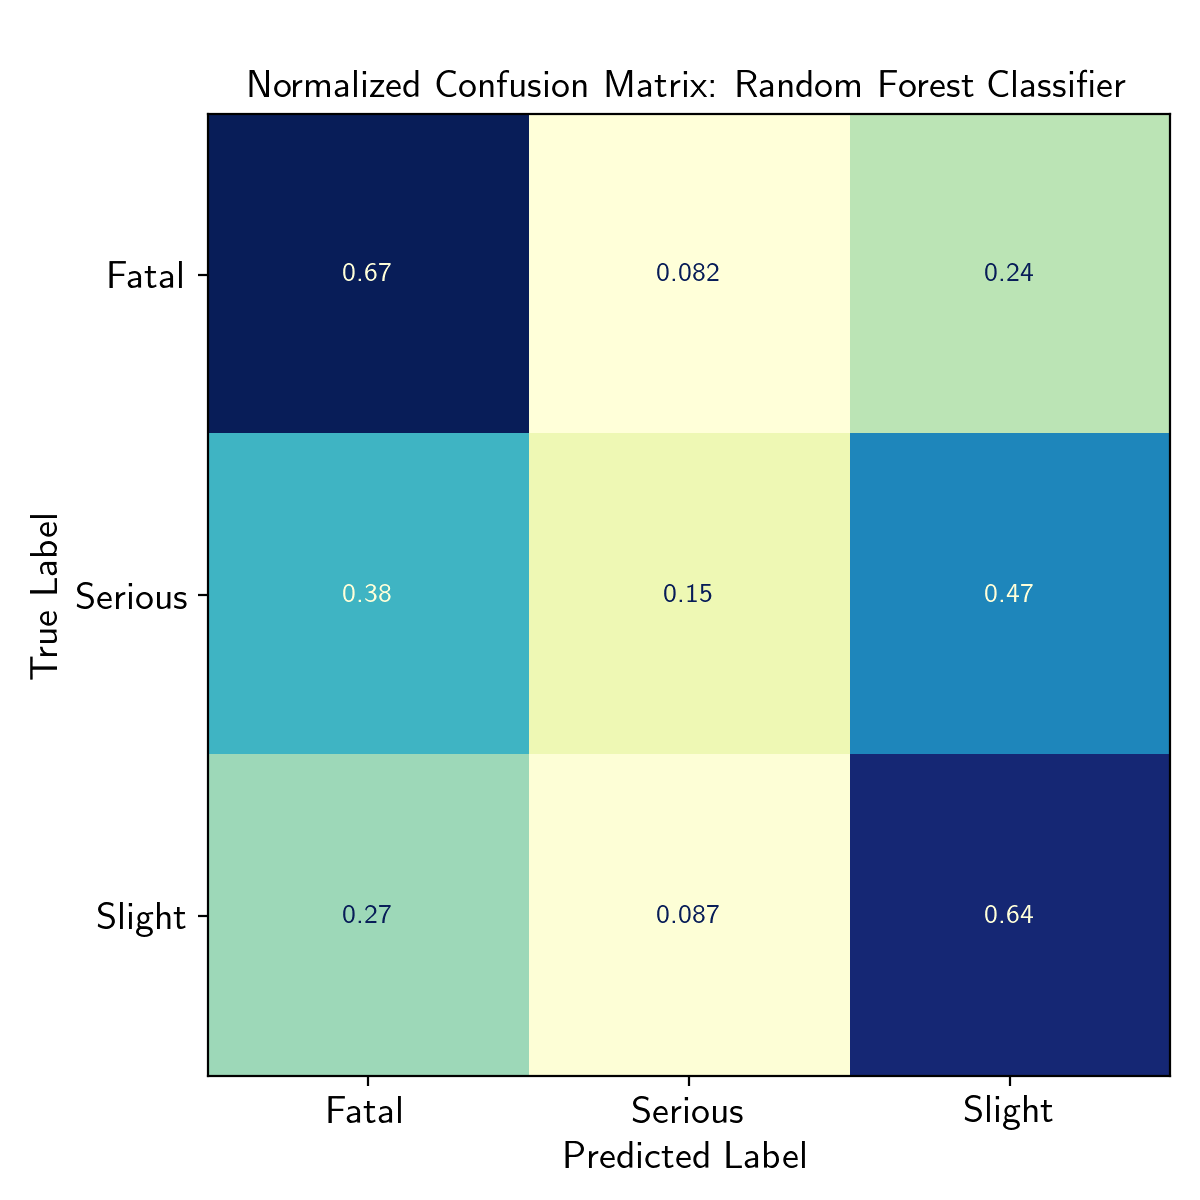

[[0.67419355 0.08234295 0.2434635 ]
 [0.38247827 0.15033237 0.46718936]
 [0.27402253 0.08697813 0.63899934]]


In [40]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
fontsize=14

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(clf.fit(X_train, y_train) , X_test, y_test,
                             cmap=plt.cm.YlGnBu,
                             normalize='true',
                             ax = ax1)

ax1.set_title('Normalized Confusion Matrix: Random Forest Classifier',fontsize=fontsize)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.set_xlabel('Predicted Label', fontsize=fontsize)
ax1.set_ylabel('True Label', fontsize=fontsize)
# remove the colorbar
disp.im_.colorbar.remove()

plt.tight_layout()
plt.savefig('/Users/rem/IBM_data_science/9_Capstone/figures/randFor_conf_matrix.png',dpi=300)

print(disp.confusion_matrix)

### Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [30]:
# Support Vector Machines
yhat_gnb = gnb.predict(X_test)
# print(yhat_svm_rbf[0:5])
print("Gaussian Naive Bayes Precision Score: %0.2f" % metrics.precision_score(y_test, yhat_gnb, average='weighted'))
print("Gaussian Naive Bayes Recall Score: %0.2f" % metrics.recall_score(y_test, yhat_gnb, average='weighted'))
print("Gaussian Naive Bayes Jaccard Score: %0.2f" % metrics.jaccard_score(y_test, yhat_gnb, average='weighted'))
print("Gaussian Naive Bayes F1-Score: %0.2f" % metrics.f1_score(y_test, yhat_gnb, average='weighted'))


Gaussian Naive Bayes Precision Score: 0.49
Gaussian Naive Bayes Recall Score: 0.49
Gaussian Naive Bayes Jaccard Score: 0.31
Gaussian Naive Bayes F1-Score: 0.46


<IPython.core.display.Javascript object>


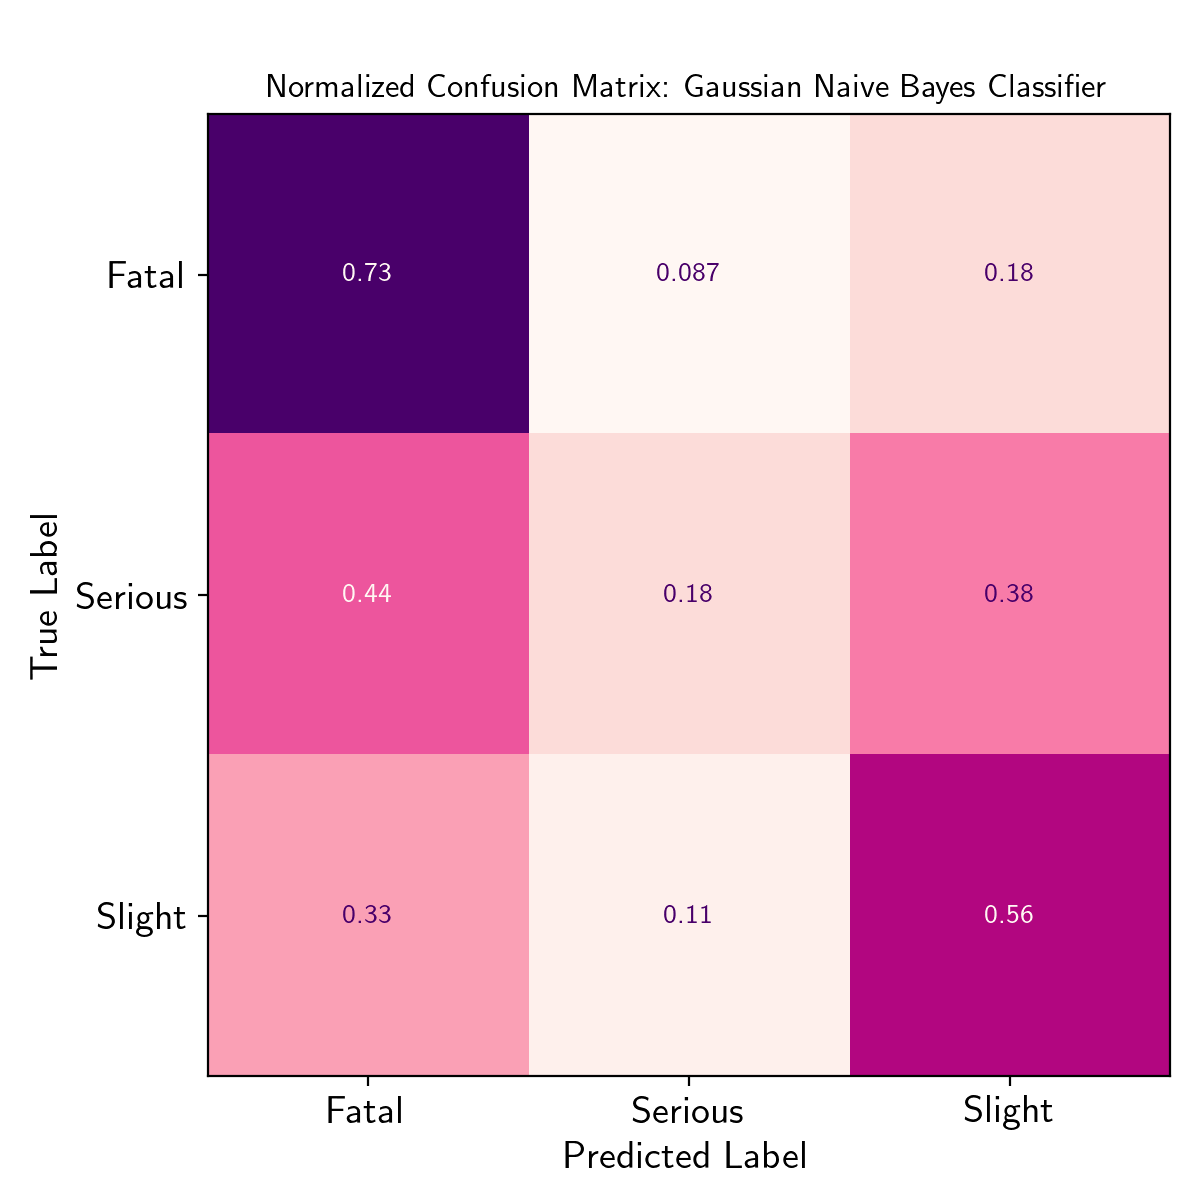

[[0.73344652 0.08692699 0.17962649]
 [0.44025908 0.17879666 0.38094426]
 [0.3250497  0.1119947  0.5629556 ]]


In [42]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
fontsize=14

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(gnb.fit(X_train, y_train) , X_test, y_test,
                             cmap=plt.cm.RdPu,
                             normalize='true',
                             ax = ax1)

ax1.set_title('Normalized Confusion Matrix: Gaussian Naive Bayes Classifier',fontsize=fontsize-2)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.set_xlabel('Predicted Label', fontsize=fontsize)
ax1.set_ylabel('True Label', fontsize=fontsize)
# remove the colorbar
disp.im_.colorbar.remove()

plt.tight_layout()
plt.savefig('/Users/rem/IBM_data_science/9_Capstone/figures/GaussNaiveBayes_conf_matrix.png',dpi=300)

print(disp.confusion_matrix)

### Linear Support Vector Classifier

In [32]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(random_state=0, tol=1e-5)

lsvc.fit(X_train, y_train)

LinearSVC(random_state=0, tol=1e-05)

In [33]:
# Support Vector Machines
yhat_lsvc = lsvc.predict(X_test)
# print(yhat_svm_rbf[0:5])
print("Gaussian Naive Bayes Precision Score: %0.2f" % metrics.precision_score(y_test, yhat_lsvc, average='weighted'))
print("Gaussian Naive Bayes Recall Score: %0.2f" % metrics.recall_score(y_test, yhat_lsvc, average='weighted'))
print("Gaussian Naive Bayes Jaccard Score: %0.2f" % metrics.jaccard_score(y_test, yhat_lsvc, average='weighted'))
print("Gaussian Naive Bayes F1-Score: %0.2f" % metrics.f1_score(y_test, yhat_lsvc, average='weighted'))


Gaussian Naive Bayes Precision Score: 0.49
Gaussian Naive Bayes Recall Score: 0.50
Gaussian Naive Bayes Jaccard Score: 0.31
Gaussian Naive Bayes F1-Score: 0.46


<IPython.core.display.Javascript object>


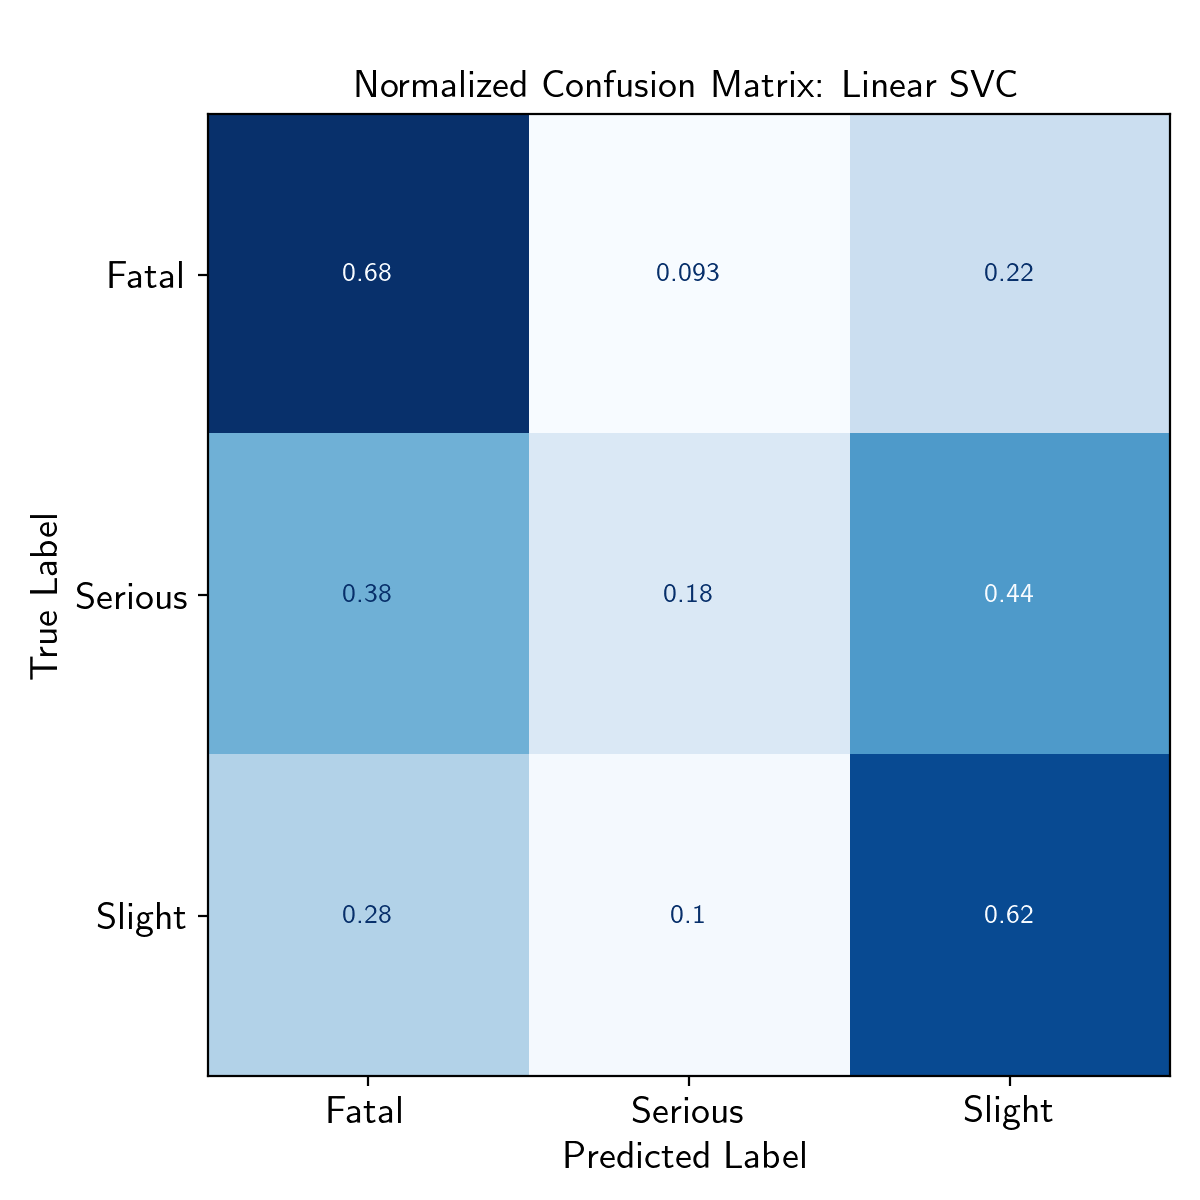

[[0.68319185 0.09320883 0.22359932]
 [0.38162604 0.17913755 0.43923641]
 [0.27634195 0.10056329 0.62309476]]


In [44]:
fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
fontsize=14

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(lsvc.fit(X_train, y_train) , X_test, y_test,
                             cmap=plt.cm.Blues,
                             normalize='true',
                             ax = ax1)

ax1.set_title('Normalized Confusion Matrix: Linear SVC',fontsize=fontsize)
ax1.tick_params(axis='both', labelsize=fontsize)
ax1.set_xlabel('Predicted Label', fontsize=fontsize)
ax1.set_ylabel('True Label', fontsize=fontsize)
# remove the colorbar
disp.im_.colorbar.remove()

plt.tight_layout()
plt.savefig('/Users/rem/IBM_data_science/9_Capstone/figures/LinearSVC_conf_matrix.png',dpi=300)

print(disp.confusion_matrix)

## Results

We summarize the results of various machine learning models below.  Because we are using multi-class (3 labels) classification - and not binary classification - we are limited to metrics derived from confusion matrices.  We use precision score, recall score, Jaccard score, and F1 scores to assess the performnace of the various machine learning models.

| Classifier          | Precision Score | Recall Score | Jaccard Score | F1 Score | Fatal TP | Serious TP | Slight TP |
|---------------------| --------------- | -------------|---------------|----------|----------|------------|-----------|
|$k$-Nearest Neighbors| 0.48            | 0.49         |0.31           |0.47      |0.67      | 0.21       | 0.59      |
|Decision Tree        | 0.49            | 0.50         |0.31           |0.46      |0.65      | 0.18       | 0.66      |
| SVC RBF             | 0.48            | 0.49         |0.32           |0.47      |0.67      | 0.21       | 0.61      |
| Random Forest       | 0.48            | 0.49         |0.30           |0.45      |0.67      | 0.15       | 0.54      |
| Gaussian Naive Bayes| 0.49            | 0.49         |0.31           |0.46      |0.73      | 0.18       | 0.56      |
| Linear SVC          | 0.49            | 0.50         |0.31           |0.46      |0.68      | 0.18       | 0.62      |

### Discussion

We can see that performance measures are generally poor across the board.  This is due to the fact that although we have three distinct labels for classification, there is no single good predictor for "serious" accidents.  This can be seen in all confusion matrices as well as the heatmaps generated for data exploration.  There is also no consistent way of combining "serious" labels with the other two classes, since often times serious accidents occur at frequencies between the two others.
<br><br/>
Overall the Radial Basis Function (RBF) Support Vector Classifier (SVC) performs best, with high true positive rate for "serious" cases.  The $k$-Nearest Neighbors classifier performs similarly to the RBF SVC model.  The Gaussian Naive Bayes model results in the highest true positive rate for "fatal" accidents, at the expense of performance on the other two label classifications.  The Decision Tree classifier performs the best in identifying true positive cases for slight accidents, but at the expense of the other two target labels.
<br><br/>
This exercise reveals that while there are good a number of good predictors for slight and fatal accidents, there is no single good predictor for serious accidents.  The reasons for this are that slight and fatal accidents are on two extremes of many predictors, with serious cases split between the two extremes.  This makes it difficult for the machine learning model to distinguish serious cases from slight or fatal accident cases. 
<br><br/>
Possible solutions for future studies could be to limit the classification to binary instead of multi-class, either by studying slight and fatal independently from serious, or some variation of two classes independent from the other.  However in this exercise, we explicitly set out to perform multi-class (3) classification.  A good predictor for serious cases may not currently exist, or cannot be accounted for with current data.  It is very likely that serious cases could be caused by multiple conditions, as well as random chance, making it very difficult to predict.